# Gradient Boost  

[video link](https://youtu.be/a7ziskNh0DY)  

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

We will need to run several iterations, so let's create a function to implement GradBoost  

In [8]:
def GradBoost(model, X_train, y_train, X_test, boosting_rounds, learning_rate: float = 0.1):

    # make a first guess of our training target variable using the mean of y_train
    y_hat_train = np.repeat(np.mean(y_train), len(y_train))

    # initialize the test predictions with the mean of the training target variable
    y_hat_test = np.repeat(np.mean(y_train), len(X_test))

    # calculate the residuals from the training data using the first guess
    residuals = y_train - y_hat_train

    # iterate through the boosting round
    for i in range(0, boosting_rounds):
        # fit the model to the residuals
        model = model.fit(X_train, residuals)

        # increment the predicted training y with the pseudo residual + learning rate
        y_hat_train = y_hat_train + learning_rate * model.predict(X_train)

        # increment the predicted test y as well
        y_hat_test = y_hat_test + learning_rate * model.predict(X_test)

        # calculate the residuals for the next round
        residuals = y_train - y_hat_train

    return y_hat_train, y_hat_test

We will create a synthetic dataset on which we will apply Gradient Boost.

In [9]:
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=1000,
                        n_features=20,
                        n_informative=15,
                        n_targets=1,
                        bias=0.0,
                        noise=20,
                        shuffle=True,
                        random_state=13)

X_train = X[0:800]
y_train = y[0:800]

X_test = X[800:]
y_test = y[800:]

The weak learner that we will use is DecisionTreeRegressor with a depth of 3. We can also use other regressors such as linear regression, ridge regression etc.  

In [10]:
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(criterion='squared_error', max_depth=3)

Let us now see how the squared error reduces as we keep increasing the number of boosting rounds.  
We will store the errors in a list, and will plot further.  

In [11]:
mse_train = []
n_rounds = np.arange(5, 101, 5)
for n_round in n_rounds:
    y_hat_train = GradBoost(model,
                            X_train,
                            y_train,
                            X_test,
                            boosting_rounds=n_round,
                            learning_rate=0.1)[0]
    print(f"round #{n_round}")

    mse_train.append(np.mean((y_train - y_hat_train) ** 2))


round #5
round #10
round #15
round #20
round #25
round #30
round #35
round #40
round #45
round #50
round #55
round #60
round #65
round #70
round #75
round #80
round #85
round #90
round #95
round #100


Lets plot the reduction in training error wrt the number of boosting rounds. (We can simply plot for test_error)  

Text(0, 0.5, 'Training Mean Squared Error')

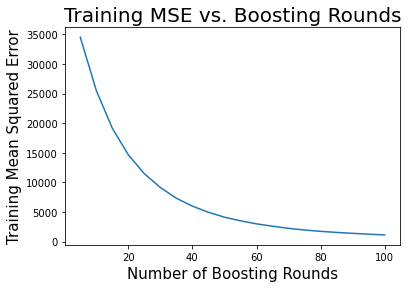

In [13]:
plt.rcParams['figure.figsize'] = (10, 8)

plt.plot(n_rounds, mse_train)
plt.title(f"Training MSE vs. Boosting Rounds", fontsize=20)
plt.xlabel(f"Number of Boosting Rounds", fontsize=15)
plt.ylabel(f"Training Mean Squared Error", fontsize=15)

### boosting_rounds = 0  

We can also compare the actual target values with the predicted values for a given boosting_rounds value. Initially, we consider the mean of y_train values as the prediction. Lets plot that.  

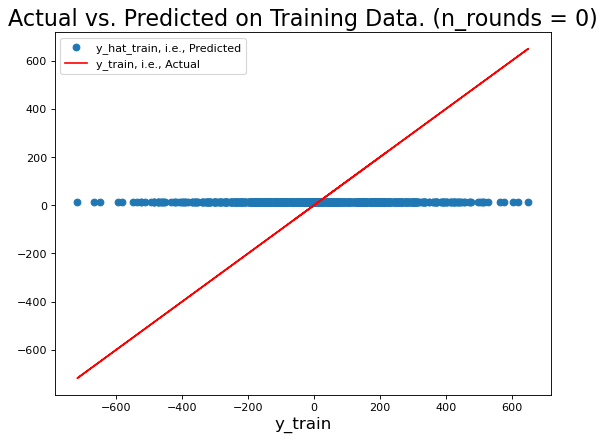

In [14]:
fig = plt.figure(figsize=(8,6), dpi=80, facecolor='w', edgecolor='k')

n_rounds = 0

y_hat_train, y_hat_test = GradBoost(model,
                                    X_train,
                                    y_train,
                                    X_test,
                                    boosting_rounds=n_rounds,
                                    learning_rate=0.1)

plt.scatter(y_train, y_hat_train, label = 'y_hat_train, i.e., Predicted')
plt.title(f"Actual vs. Predicted on Training Data. (n_rounds = {n_rounds})", fontsize=20)
plt.xlabel('y_train', fontsize=15)
plt.plot(y_train, y_train, color='r', label = 'y_train, i.e., Actual')
plt.legend()

(Similarly, we can also plot for y_test and y_test_hat)

### boosting_rounds = 10  

We can see how the prediction gets better as the number of training rounds is increased to 10.  

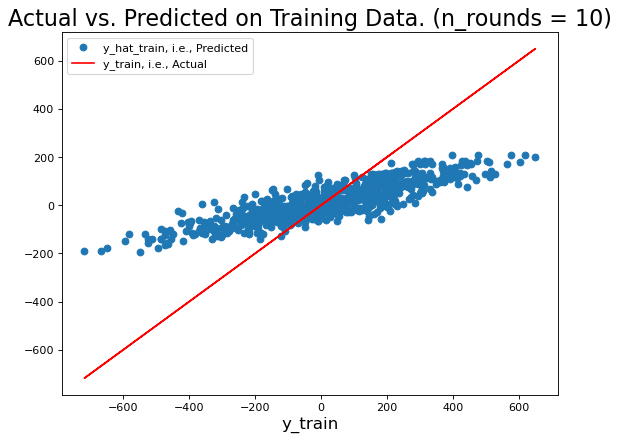

In [15]:
fig = plt.figure(figsize=(8,6), dpi=80, facecolor='w', edgecolor='k')

n_rounds = 10

y_hat_train, y_hat_test = GradBoost(model,
                                    X_train,
                                    y_train,
                                    X_test,
                                    boosting_rounds=n_rounds,
                                    learning_rate=0.1)

plt.scatter(y_train, y_hat_train, label = 'y_hat_train, i.e., Predicted')
plt.title(f"Actual vs. Predicted on Training Data. (n_rounds = {n_rounds})", fontsize=20)
plt.xlabel('y_train', fontsize=15)
plt.plot(y_train, y_train, color='r', label = 'y_train, i.e., Actual')
plt.legend()

### boosting_rounds = 100  

We can see how the prediction gets better as the number of training rounds is increased to 100.  

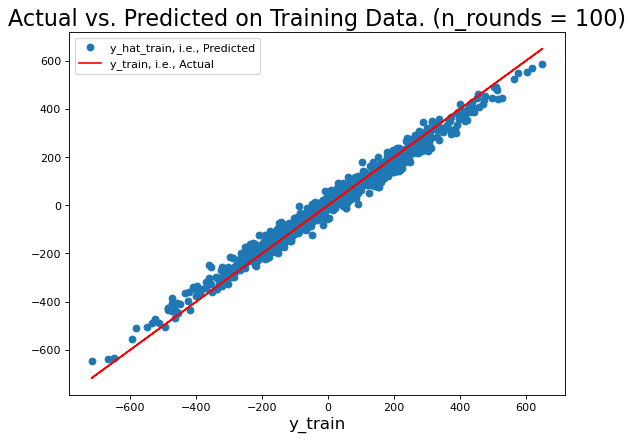

In [16]:
fig = plt.figure(figsize=(8,6), dpi=80, facecolor='w', edgecolor='k')

n_rounds = 100

y_hat_train, y_hat_test = GradBoost(model,
                                    X_train,
                                    y_train,
                                    X_test,
                                    boosting_rounds=n_rounds,
                                    learning_rate=0.1)

plt.scatter(y_train, y_hat_train, label = 'y_hat_train, i.e., Predicted')
plt.title(f"Actual vs. Predicted on Training Data. (n_rounds = {n_rounds})", fontsize=20)
plt.xlabel('y_train', fontsize=15)
plt.plot(y_train, y_train, color='r', label = 'y_train, i.e., Actual')
plt.legend()

### boosting_rounds = 500  

We can see how the prediction gets better as the number of training rounds is increased to 500.  

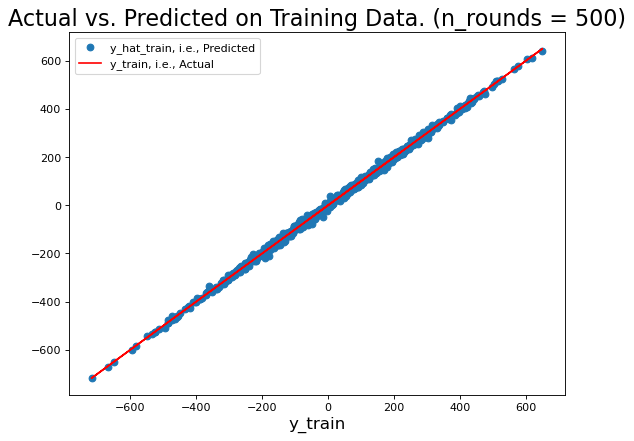

In [17]:
fig = plt.figure(figsize=(8,6), dpi=80, facecolor='w', edgecolor='k')

n_rounds = 500

y_hat_train, y_hat_test = GradBoost(model,
                                    X_train,
                                    y_train,
                                    X_test,
                                    boosting_rounds=n_rounds,
                                    learning_rate=0.1)

plt.scatter(y_train, y_hat_train, label = 'y_hat_train, i.e., Predicted')
plt.title(f"Actual vs. Predicted on Training Data. (n_rounds = {n_rounds})", fontsize=20)
plt.xlabel('y_train', fontsize=15)
plt.plot(y_train, y_train, color='r', label = 'y_train, i.e., Actual')
plt.legend()